In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2      #visualisation
%matplotlib inline
sns.set(color_codes=True)
import scipy.stats as stats

In [3]:
#df = pd.read_csv("onlinefraud.csv")
# To display the top 5 rows
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df = df.drop(['step','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud'], axis=1)
df.head(5)

,type,isFraud
0,PAYMENT,0
1,PAYMENT,0
2,TRANSFER,1
3,CASH_OUT,1
4,PAYMENT,0


In [5]:
total=df.count()['type']
print(total)

6362620


In [6]:
data_whole={}
for i in df.type.unique():
  data_whole[i]=df[df['type']==i].count()['type']
print(data_whole)

{'PAYMENT': 2151495, 'TRANSFER': 532909, 'CASH_OUT': 2237500, 'DEBIT': 41432, 'CASH_IN': 1399284}


In [7]:
data_fraud={}
fraud_df=df[df['isFraud']==1]
for i in fraud_df.type.unique():
  data_fraud[i]=fraud_df[fraud_df['type']==i].count()['type']
print(data_fraud)

{'TRANSFER': 4097, 'CASH_OUT': 4116}


In [8]:
whole_ratios={}
for i in data_whole.keys():
  whole_ratios[i]=data_whole[i]/total
print(whole_ratios)

{'PAYMENT': 0.3381460781879163, 'TRANSFER': 0.08375621992198183, 'CASH_OUT': 0.35166330851127364, 'DEBIT': 0.006511782881894566, 'CASH_IN': 0.21992261049693365}


In [9]:
whole_ratios.pop('PAYMENT')
whole_ratios.pop('DEBIT')
whole_ratios.pop('CASH_IN')

0.21992261049693365

In [10]:
total_fraud=df[df['isFraud']==1].count()['type']
print(total_fraud)

8213


In [11]:
print(whole_ratios)

{'TRANSFER': 0.08375621992198183, 'CASH_OUT': 0.35166330851127364}


In [12]:
fraud_ratios={}
for i in data_fraud.keys():
  fraud_ratios[i]=data_fraud[i]/total_fraud
print(fraud_ratios)

{'TRANSFER': 0.4988432972117375, 'CASH_OUT': 0.5011567027882625}


In [13]:
print(fraud_ratios)

{'TRANSFER': 0.4988432972117375, 'CASH_OUT': 0.5011567027882625}


In [14]:
final=0
for i in whole_ratios.keys():
  final+=((fraud_ratios[i]-whole_ratios[i])**2)/whole_ratios[i]
print(final)

2.120678401505802


In [22]:
crit=stats.chi2.ppf(q=0.95, df=1)
print(crit)
p_value = 1 - stats.chi2.cdf(x=final, df =1)
print(p_value)

3.841458820694124
0.14532216155284194


In [20]:
plt.figure(figsize=(15,6))
sns.displot(df['step'],bins=100)

KeyError: 'step'

<Figure size 1500x600 with 0 Axes>

In [21]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['isFraud']==1]['step'],bins=100)

KeyError: 'step'

<Figure size 1500x600 with 0 Axes>

In [23]:
df = df.drop(['type','nameOrig', 'nameDest','isFlaggedFraud','step'], axis=1)
df.head(5)

KeyError: "['nameOrig', 'nameDest', 'isFlaggedFraud', 'step'] not found in axis"

In [ ]:
print(df[df['isFraud']==1])

             type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2        TRANSFER      181.00         181.00             0.0            0.00   
3        CASH_OUT      181.00         181.00             0.0        21182.00   
251      TRANSFER     2806.00        2806.00             0.0            0.00   
252      CASH_OUT     2806.00        2806.00             0.0        26202.00   
680      TRANSFER    20128.00       20128.00             0.0            0.00   
...           ...         ...            ...             ...             ...   
6362615  CASH_OUT   339682.13      339682.13             0.0            0.00   
6362616  TRANSFER  6311409.28     6311409.28             0.0            0.00   
6362617  CASH_OUT  6311409.28     6311409.28             0.0        68488.84   
6362618  TRANSFER   850002.52      850002.52             0.0            0.00   
6362619  CASH_OUT   850002.52      850002.52             0.0      6510099.11   

         newbalanceDest  isFraud  
2   

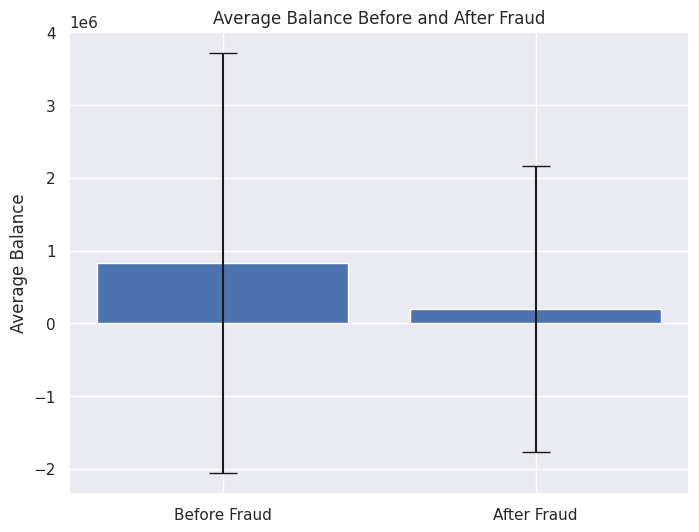

In [ ]:
# Calculate average balances before and after fraud
average_original_balance = df[df['isFraud'] == 0]['oldbalanceOrg'].mean()
average_new_balance = df[df['isFraud'] == 1]['newbalanceOrig'].mean()

# Calculate standard deviations for error bars
std_original_balance = df[df['isFraud'] == 0]['oldbalanceOrg'].std()
std_new_balance = df[df['isFraud'] == 1]['newbalanceOrig'].std()

# Create a bar plot with error bars
plt.figure(figsize=(8, 6))
plt.bar(['Before Fraud', 'After Fraud'], [average_original_balance, average_new_balance], yerr=[std_original_balance, std_new_balance], capsize=10)
plt.title('Average Balance Before and After Fraud')
plt.ylabel('Average Balance')
plt.show()

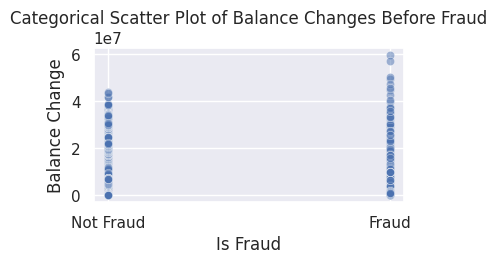

In [ ]:
plt.figure(figsize=(4, 2))
sns.scatterplot(x='isFraud', y='oldbalanceOrg', data=df, alpha=0.5)
plt.title('Categorical Scatter Plot of Balance Changes Before Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

<Axes: xlabel='type'>

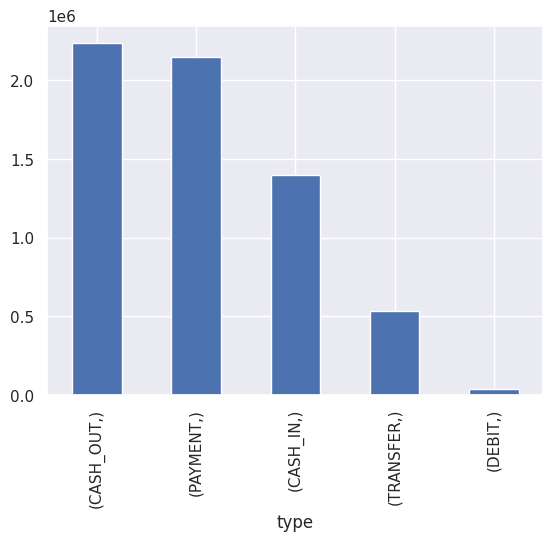

In [ ]:
cc = []
nc = []

for i in df.columns:
    if df[i].dtype == 'object':
        cc.append(i)
    else:
        nc.append(i)
df[cc].value_counts().plot(kind='bar')

<Axes: xlabel='type'>

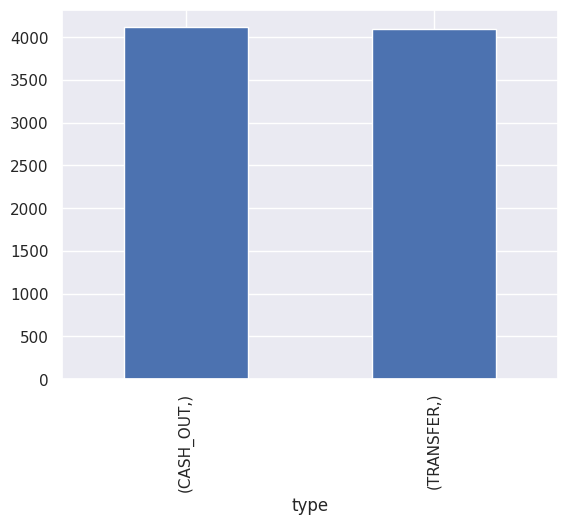

In [ ]:
cc = []
nc = []

df=df[df['isFraud']==1]
for i in df.columns:
    if df[i].dtype == 'object':
        cc.append(i)
    else:
        nc.append(i)
df[cc].value_counts().plot(kind='bar')

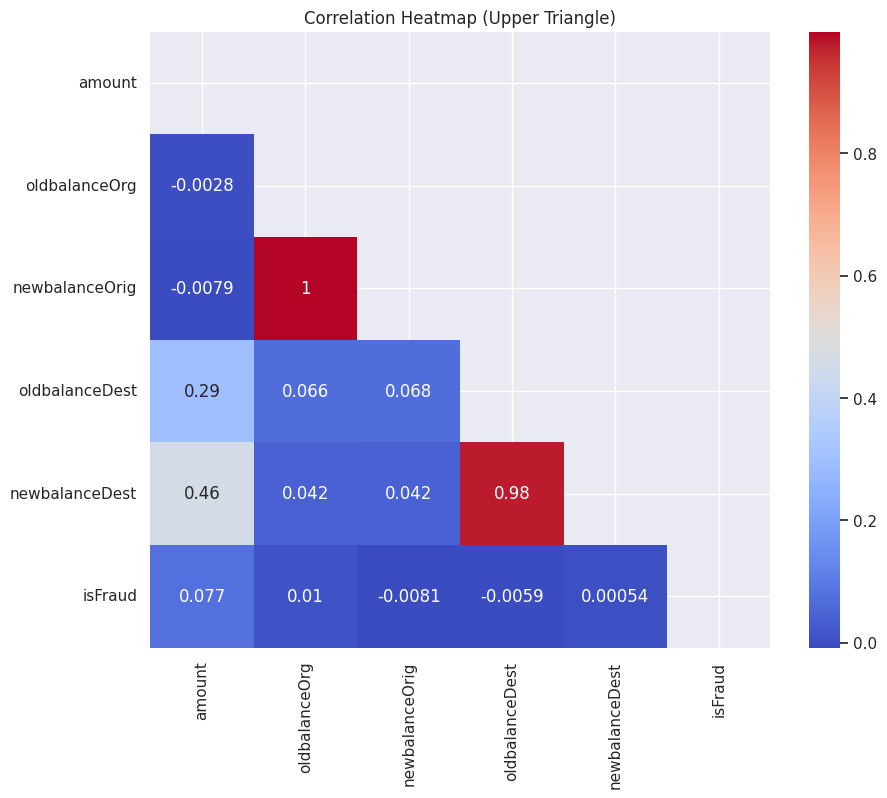

In [ ]:
correlation_matrix = df[nc].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap (Upper Triangle)')
plt.show()

In [ ]:
print(df.mean(numeric_only=True))
normal_amount_mean = df.mean(numeric_only=True)['amount']
print(normal_amount_mean)
print("____")
print(df.median(numeric_only=True))
print("____")
print(df.mode(numeric_only=True))

step              2.433972e+02
amount            1.798619e+05
oldbalanceOrg     8.338831e+05
newbalanceOrig    8.551137e+05
oldbalanceDest    1.100702e+06
newbalanceDest    1.224996e+06
isFraud           1.290820e-03
isFlaggedFraud    2.514687e-06
dtype: float64
179861.90354913071
____
step                 239.000
amount             74871.940
oldbalanceOrg      14208.000
newbalanceOrig         0.000
oldbalanceDest    132705.665
newbalanceDest    214661.440
isFraud                0.000
isFlaggedFraud         0.000
dtype: float64
____
   step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0    19  10000000.0            0.0             0.0             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  


In [ ]:
stats.ttest_1samp(a=df[df['isFraud']==1]['amount'].array, popmean= normal_amount_mean)

TtestResult(statistic=48.55368022397549, pvalue=0.0, df=8212)

In [ ]:
print(df[df['isFraud']==1].mean(numeric_only=True))
fraud_amount_mean = df.mean(numeric_only=True)['amount']
print(fraud_amount_mean)
print(df[df['isFraud']==1]['amount'].array)
print("____")
print(df[df['isFraud']==1].median(numeric_only=True))
print("____")
print(df[df['isFraud']==1].mode(numeric_only=True))

step              3.684139e+02
amount            1.467967e+06
oldbalanceOrg     1.649668e+06
newbalanceOrig    1.923926e+05
oldbalanceDest    5.442496e+05
newbalanceDest    1.279708e+06
isFraud           1.000000e+00
isFlaggedFraud    1.948131e-03
dtype: float64
179861.90354913071
<PandasArray>
[     181.0,      181.0,     2806.0,     2806.0,    20128.0,    20128.0,
  416001.33, 1277212.77, 1277212.77,   35063.63,
 ...
   63416.99,   63416.99, 1258818.82, 1258818.82,  339682.13,  339682.13,
 6311409.28, 6311409.28,  850002.52,  850002.52]
Length: 8213, dtype: float64
____
step                 367.00
amount            441423.44
oldbalanceOrg     438983.45
newbalanceOrig         0.00
oldbalanceDest         0.00
newbalanceDest      4676.42
isFraud                1.00
isFlaggedFraud         0.00
dtype: float64
____
   step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   212  10000000.0     10000000.0             0.0             0.0   

   newbalanceDest  isFraud  isFlagge

In [ ]:
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq         df              F  PR(>F)
type      3.459171e+17        4.0  278715.542079     0.0
Residual  1.974179e+18  6362615.0            NaN     NaN


In [ ]:
data={}
for i in df['type'].unique():
  print(i,":",df[df['type']==i].mean(numeric_only=True)['amount'])
  data[i]=df[df['type']==i].mean(numeric_only=True)['amount']


PAYMENT : 13057.604660187455
TRANSFER : 910647.0096454925
CASH_OUT : 176273.96434614065
DEBIT : 5483.6653137671365
CASH_IN : 168920.2420040964


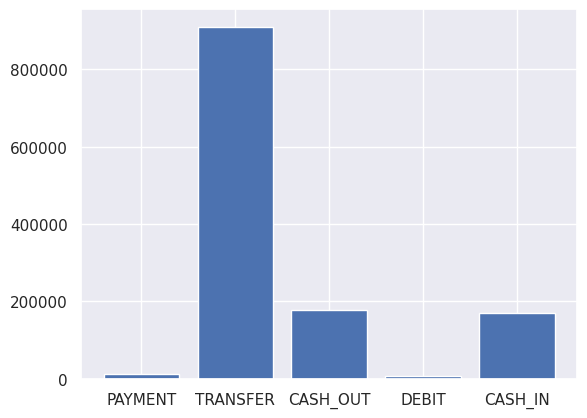

In [ ]:
import matplotlib.pyplot as plt
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()